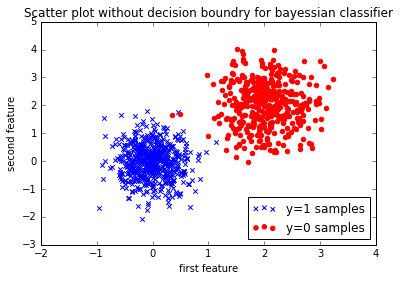

In [5]:
#generating data with 2 variate distribution

import numpy as np
import matplotlib.pyplot as plt

def generatedata(P1,mu1,Sigma1,mu2,Sigma2,N):
    Y = np.zeros(N)
    t = np.random.uniform(0,1,N)
    Y[t<=P1] = 1
    N1 = int(np.sum(Y))
    X = np.zeros((N, 2))
    X[Y == 1] = np.random.multivariate_normal(mu1,Sigma1,N1)
    X[Y == 0] = np.random.multivariate_normal(mu2, Sigma2, N - N1)
    return X,Y
P1 = 0.6
P2 = 1 - P1
Sigma1 = [[0.1, 0], [0, 0.4]]
Sigma2 = [[0.2, 0], [0, 0.6]]
mu1 = (0, 0)
mu2 = (2, 2)
N = 1000
X,Y = generatedata(P1,mu1,Sigma1,mu2,Sigma2,N)
#plt.hist(X, bins = 1000)
#print(X)
#print(Y)
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], marker='x', color='blue', label='y=1 samples')
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], marker='o', color='red', label='y=0 samples')
plt.title('Scatter plot without decision boundry for bayessian classifier')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='lower right')
plt.show()

In [2]:
#creating and defining bayesClassifier #it works with inbuilt function here

import math
import scipy as sp
import scipy.stats as ss
''' Input : x = data vector 
    Return Value : Preddicted class label'''
def bayesClassifier(x, mu1, Sigma1, mu2, Sigma2):
    '''fill in the details'''
    s = x.shape[0]
    pred = np.zeros(s)
    predorg = np.zeros(s)
    
    prob1 = ss.multivariate_normal.pdf(x, mu1, Sigma1)
    prob2 = ss.multivariate_normal.pdf(x, mu2, Sigma2)
    
    pred[prob1*P1 >= prob2*P2] = 1
    predorg[prob1 >= prob2] = 1
    
    return pred, predorg

In [3]:
#calculating accuracy

#actual class decided by generateData
#X,Y = generatedata(P1,mu1,Sigma1,mu2,Sigma2,N)
#which is done in above first code blcok.

#prediction by BayesClassifier
#here we are using the same codeblock we used for generateData()
prediction, predictionorg = bayesClassifier(X, mu1, Sigma1, mu2, Sigma2)
truePred = np.sum(predictionorg == prediction)
accuracy = (truePred * 100) / N
accuracy

100.0

- Now $P(\pi_1|x) = P(\pi_2|x)$ translates to the following equation by taking log on both sides.
- $-\frac{(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)}{2} + \ln(q_1) - \frac{d}{2}{\ln(2\pi)} - \frac{1}{2} \ln(|\Sigma_1|) =  -\frac{(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2)}{2} + \ln(q_2) - \frac{d}{2}{\ln(2\pi)} - \frac{1}{2} \ln(|\Sigma_2|)$

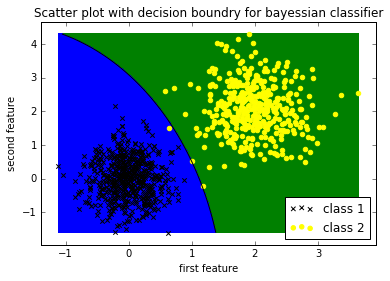

In [4]:
#for boundry ploting
#fBoundryCal function computes boundry equation
def BoundryCal(GridPoints, P1, mu1, mu2, Sigma1, Sigma2):
    P2 = 1 - P1
    problog = np.log(P1/P2)
    covlog = 0.5 * np.log(np.linalg.det(Sigma2) / np.linalg.det(Sigma1))
   
    t2 = (GridPoints - mu2)
    covinv2 = np.linalg.inv(Sigma2)
    t1 = (GridPoints - mu1)
    covinv1 = np.linalg.inv(Sigma1)

    exp1 = 0.5 * (t1.T.dot(covinv1))*t1.T
    exp2 = 0.5 * (t2.T.dot(covinv2))*t2.T
    expterm1 = exp1[:, 0]+exp1[:,1]
    expterm2 = exp2[:, 0]+exp2[:,1]
    
    meshgrid = problog + covlog + expterm2 - expterm1

    return meshgrid

x1min = np.ndarray.min(X[:, 0])
x1max = np.ndarray.max(X[:, 0])
x2min = np.ndarray.min(X[:, 1])
x2max = np.ndarray.max(X[:, 1])
x1range = np.linspace(x1min, x1max, 1000)
x2range = np.linspace(x2min, x2max, 1000)
x1, x2 = np.meshgrid(x1range, x2range)
GridPoints = np.zeros((2, np.prod(x1.shape)))
GridPoints[0,:] = x1.ravel()
GridPoints[1,:] = x2.ravel()
mu1 = np.array(mu1).reshape(2,1)
mu2 = np.array(mu2).reshape(2,1)
B = BoundryCal(GridPoints, P1, mu1, mu2, Sigma1, Sigma2)
B = B.reshape(*x1.shape)
predcheck = np.zeros_like(B)
predcheck[B < 0] = -1.0
predcheck[B > 0] = 1.0
contour = plt.contour(x1range, x2range, B ,levels = [0], colors=['k']);
plt.contourf(x1range, x2range, predcheck, colors=['g','b']);
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], marker='x', color='black', label='class 1')
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], marker='o', color='yellow', label='class 2')
plt.title('Scatter plot with decision boundry for bayessian classifier')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='lower right')
plt.show()
